In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Załaduj dane Indian Pima
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Podział danych na cechy (X) i etykiety (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 2. Podziel dane na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizacja cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# 4. Budowa modelu z regularyzacją wag L2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# 5. Trenowanie modelu
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
31/31 [==============================] - 3s 16ms/step - loss: 0.8950 - accuracy: 0.4623 - val_loss: 0.8675 - val_accuracy: 0.5854
Epoch 2/50
31/31 [==============================] - 0s 5ms/step - loss: 0.8561 - accuracy: 0.6436 - val_loss: 0.8397 - val_accuracy: 0.6992
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 0.8246 - accuracy: 0.7393 - val_loss: 0.8155 - val_accuracy: 0.7398
Epoch 4/50
31/31 [==============================] - 0s 6ms/step - loss: 0.7930 - accuracy: 0.7658 - val_loss: 0.7893 - val_accuracy: 0.7561
Epoch 5/50
31/31 [==============================] - 0s 9ms/step - loss: 0.7579 - accuracy: 0.7658 - val_loss: 0.7586 - val_accuracy: 0.7398
Epoch 6/50
31/31 [==============================] - 0s 10ms/step - loss: 0.7205 - accuracy: 0.7576 - val_loss: 0.7282 - val_accuracy: 0.7154
Epoch 7/50
31/31 [==============================] - 0s 9ms/step - loss: 0.6831 - accuracy: 0.7719 - val_loss: 0.6954 - val_accuracy: 0.7073
Epoch 8/50
31/31 [

In [7]:
# 6. Zapisanie wag modelu
model.save_weights("model_weights.h5")

In [8]:
# 7. Tworzenie nowego modelu i załadowanie wag
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
new_model.load_weights("model_weights.h5")

In [9]:
# 8. Ocena modelu na danych testowych
loss, accuracy = new_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

5/5 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7468
Accuracy on test data: 74.68%


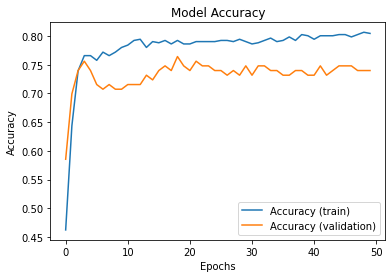

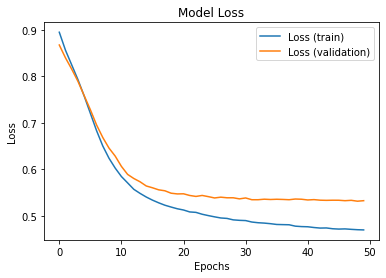

In [10]:
# 9. Wizualizacja wyników
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()